In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('Social_Network_Ads.csv')

df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [12]:
df = pd.concat([df.drop('Gender', axis=1),
                pd.get_dummies(df['Gender'], drop_first=True)], axis=1)

In [14]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('max depth : ', clf.tree_.max_depth)
print('train accuracy : ', clf.score(X_train, y_train))
print('test accuracy : ', clf.score(X_test, y_test))

max depth :  19
train accuracy :  0.978125
test accuracy :  0.5125


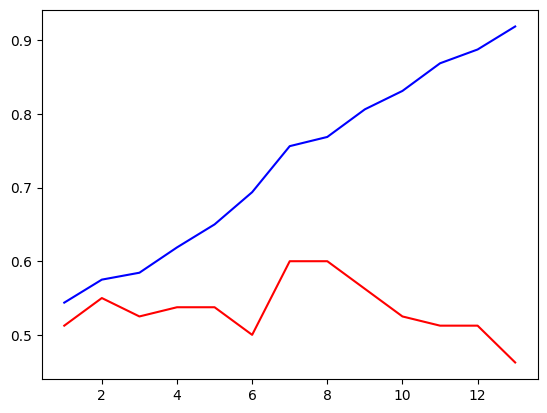

In [20]:
train_scores = []
test_scores = []
for d in range(1, 14):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot(np.arange(1, 14, 1), np.array(train_scores), 'b-')
plt.plot(np.arange(1, 14, 1), np.array(test_scores), 'r-')

In [22]:
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf.fit(X_train, y_train)
print('max depth : ', clf.tree_.max_depth)
print('train accuracy : ', clf.score(X_train, y_train))
print('test accuracy : ', clf.score(X_test, y_test))

max depth :  2
train accuracy :  0.56875
test accuracy :  0.5375


# Visualization

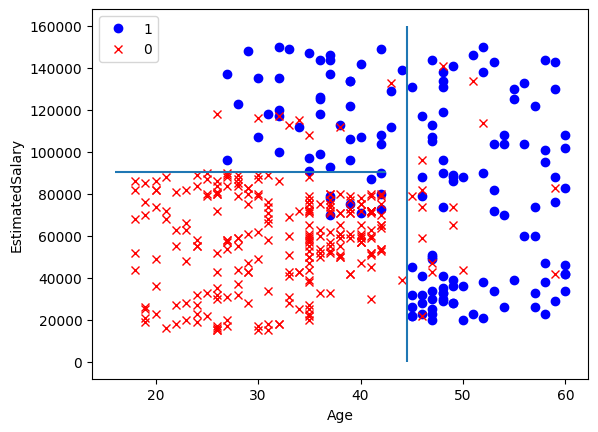

In [24]:
plt.plot(df[df['Purchased'] == 1]['Age'],
         df[df['Purchased'] == 1]['EstimatedSalary'], 'bo', label='1')

plt.plot(df[df['Purchased'] == 0]['Age'],
         df[df['Purchased'] == 0]['EstimatedSalary'], 'rx', label='0')

plt.vlines(44.5, 0, 160000)
plt.hlines(90500, 16, 42.5)

plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()